In [102]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import csv
import plotly.express as px

In [2]:
import requests
import requests as req
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import time
import pickle

In [3]:
from html_table_parser import parser_functions
from html_table_parser import parser_functions as parser

In [4]:
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [5]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [42]:
df = pd.read_csv('최최최종기사.csv')

C:\Users\bitcamp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
df = df.drop('Unnamed: 0', axis = 1)
df

,기업,날짜,제목,내용,code,제목_내용,token
0,AJ네트웍스,2017-01-02,"[더벨]KB투자증권, 공모주하이일드랩 성과 '눈길'","현재까지 현대로지스틱스, AJ네트웍스, 두산엔진 등을 편입했다. 한국기업평가가 ...",95570,"[더벨]KB투자증권, 공모주하이일드랩 성과 '눈길' 현재까지 현대로지스틱스, AJ...",더벨 투자 증권 공 모 주하이 일드 랩 성과 눈길 현재 까지 현대 로지 ...
1,AJ네트웍스,2017-01-02,SK텔레콤 IoT '로라'…첫걸음 뗐다,"대략 살펴보면, 작년 8월 AJ네트웍스, 삼성SDS와 함께 로라 망을 활용한 렌...",95570,"SK텔레콤 IoT '로라'…첫걸음 뗐다 대략 살펴보면, 작년 8월 AJ네트웍스, ...",텔레콤 로라 첫걸음 뗐다 대략 살펴보면 작년 월 네트웍 스 삼성 와 ...
2,AJ네트웍스,2017-01-05,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준",표준편차 수익율 위험대비 수익율 코스맥스비티아이 2.0% 20.7% 10.3 종...,95570,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준 표준편...",로봇 뉴스 웅진 씽크빅 위험 대비 수익률 으로 하위 권 업종 내 평균 치 ...
3,AJ네트웍스,2017-01-05,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...,95570,"[더벨]AJ네트웍스, 금융비용 부담 '가중' AJ네트웍스의 금융비용 부담이 가중되...",더벨 네트웍 스 금융 비용 부담 가중 네트웍 스 의 금융 비용 부담 이...
4,AJ네트웍스,2017-01-05,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준",표준편차 수익율 위험대비 수익율 코스맥스비티아이 2.0% 20.7% 10.3 종...,95570,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준 표준편...",로봇 뉴스 웅진 씽크빅 위험 대비 수익률 으로 하위 권 업종 내 평균 치 ...
...,...,...,...,...,...,...,...
3278381,힘스,2021-12-13,"삼성서울병원, 국내 병원 최초 미 '힘스(HIMSS) INFRAM' 6단계 인증 획득",삼성서울병원이 국내 의료기관 최초로 의료 IT 인프라 표준인 '힘스(HIMSS...,238490,"삼성서울병원, 국내 병원 최초 미 '힘스(HIMSS) INFRAM' 6단계 인증 획...",삼성 서울 병원 국내 병원 최초 미 힘스 단계 인증 획득 삼 성 서울...
3278382,힘스,2021-12-15,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스...",238490,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체 필옵틱스, HB테크놀러지...",보릿고개 디스플레이 장비 사 돌파구 는 차전지 반도체 필옵틱스 테크 놀...
3278383,힘스,2021-12-19,[인천 상장기업 주간 주가 동향] 2021년 12월17일자[표],"37%) ▲힘스 9,550(0.00%) ▲제너셈 8,350(0.00%) ▲대창스...",238490,[인천 상장기업 주간 주가 동향] 2021년 12월17일자[표] 37%) ▲힘스 ...,인천 상장 기업 주간 주가 동향 년 월 일 자 표 힘스 제 너...
3278384,힘스,2021-12-19,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...,238490,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하......,뉴욕 증시 비아그라 성인 용품 온라인 판매 밈 주식 힘스 앤 허스 몰락하 ...


In [19]:
fist = pd.read_excel('finance감성사전.xlsx', index_col = 'Unnamed: 0')
fist

,neg,pos
결국,1,0
결함,1,0
공허한,1,0
과적,1,0
극심한,1,0
...,...,...
해결,0,1
호황,0,1
확보,0,1
활력,0,1


In [22]:
fist['score'] = fist['pos'].apply(lambda x : 1 if x == 1 else -1)
fist

,neg,pos,score
결국,1,0,-1
결함,1,0,-1
공허한,1,0,-1
과적,1,0,-1
극심한,1,0,-1
...,...,...,...
해결,0,1,1
호황,0,1,1
확보,0,1,1
활력,0,1,1


In [44]:
df['senti_score'] = df['token'].apply(lambda x : sum([fist.loc[token,'score'] for token in x.split() if token in fist.index]))

In [45]:
df['senti_state'] = df['senti_score'].apply(lambda x : 1 if x > 0 else x).apply(lambda x : -1 if x < 0 else x)

In [46]:
df

,기업,날짜,제목,내용,code,제목_내용,token,senti_score,senti_state
0,AJ네트웍스,2017-01-02,"[더벨]KB투자증권, 공모주하이일드랩 성과 '눈길'","현재까지 현대로지스틱스, AJ네트웍스, 두산엔진 등을 편입했다. 한국기업평가가 ...",95570,"[더벨]KB투자증권, 공모주하이일드랩 성과 '눈길' 현재까지 현대로지스틱스, AJ...",더벨 투자 증권 공 모 주하이 일드 랩 성과 눈길 현재 까지 현대 로지 ...,0,0
1,AJ네트웍스,2017-01-02,SK텔레콤 IoT '로라'…첫걸음 뗐다,"대략 살펴보면, 작년 8월 AJ네트웍스, 삼성SDS와 함께 로라 망을 활용한 렌...",95570,"SK텔레콤 IoT '로라'…첫걸음 뗐다 대략 살펴보면, 작년 8월 AJ네트웍스, ...",텔레콤 로라 첫걸음 뗐다 대략 살펴보면 작년 월 네트웍 스 삼성 와 ...,0,0
2,AJ네트웍스,2017-01-05,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준",표준편차 수익율 위험대비 수익율 코스맥스비티아이 2.0% 20.7% 10.3 종...,95570,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준 표준편...",로봇 뉴스 웅진 씽크빅 위험 대비 수익률 으로 하위 권 업종 내 평균 치 ...,0,0
3,AJ네트웍스,2017-01-05,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...,95570,"[더벨]AJ네트웍스, 금융비용 부담 '가중' AJ네트웍스의 금융비용 부담이 가중되...",더벨 네트웍 스 금융 비용 부담 가중 네트웍 스 의 금융 비용 부담 이...,0,0
4,AJ네트웍스,2017-01-05,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준",표준편차 수익율 위험대비 수익율 코스맥스비티아이 2.0% 20.7% 10.3 종...,95570,"[로봇뉴스]웅진씽크빅_위험대비수익률 5.6으로 하위권, 업종내 평균치 수준 표준편...",로봇 뉴스 웅진 씽크빅 위험 대비 수익률 으로 하위 권 업종 내 평균 치 ...,0,0
...,...,...,...,...,...,...,...,...,...
3278381,힘스,2021-12-13,"삼성서울병원, 국내 병원 최초 미 '힘스(HIMSS) INFRAM' 6단계 인증 획득",삼성서울병원이 국내 의료기관 최초로 의료 IT 인프라 표준인 '힘스(HIMSS...,238490,"삼성서울병원, 국내 병원 최초 미 '힘스(HIMSS) INFRAM' 6단계 인증 획...",삼성 서울 병원 국내 병원 최초 미 힘스 단계 인증 획득 삼 성 서울...,0,0
3278382,힘스,2021-12-15,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스...",238490,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체 필옵틱스, HB테크놀러지...",보릿고개 디스플레이 장비 사 돌파구 는 차전지 반도체 필옵틱스 테크 놀...,0,0
3278383,힘스,2021-12-19,[인천 상장기업 주간 주가 동향] 2021년 12월17일자[표],"37%) ▲힘스 9,550(0.00%) ▲제너셈 8,350(0.00%) ▲대창스...",238490,[인천 상장기업 주간 주가 동향] 2021년 12월17일자[표] 37%) ▲힘스 ...,인천 상장 기업 주간 주가 동향 년 월 일 자 표 힘스 제 너...,0,0
3278384,힘스,2021-12-19,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...,238490,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하......,뉴욕 증시 비아그라 성인 용품 온라인 판매 밈 주식 힘스 앤 허스 몰락하 ...,0,0


In [26]:
df['senti_score'].unique()

array([ 0,  1, -1, -2, -3,  3,  2,  4, -5, -4,  5, -7,  6,  9, -6,  7,  8,
       -8], dtype=int64)

In [47]:
df['senti_state'].unique()

array([ 0,  1, -1], dtype=int64)

In [37]:
df_se

,기업,날짜,code,senti_score
0,AJ네트웍스,2017-01-02,95570,0
1,AJ네트웍스,2017-01-02,95570,0
2,AJ네트웍스,2017-01-05,95570,0
3,AJ네트웍스,2017-01-05,95570,0
4,AJ네트웍스,2017-01-05,95570,0
...,...,...,...,...
3278381,힘스,2021-12-13,238490,0
3278382,힘스,2021-12-15,238490,0
3278383,힘스,2021-12-19,238490,0
3278384,힘스,2021-12-19,238490,0


In [38]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278386 entries, 0 to 3278385
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   기업           object        
 1   날짜           datetime64[ns]
 2   code         object        
 3   senti_score  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 100.0+ MB


array([[<AxesSubplot:title={'center':'LG화학'}>,
        <AxesSubplot:title={'center':'더존비즈온'}>],
       [<AxesSubplot:title={'center':'삼성전자'}>,
        <AxesSubplot:title={'center':'흥국'}>]], dtype=object)

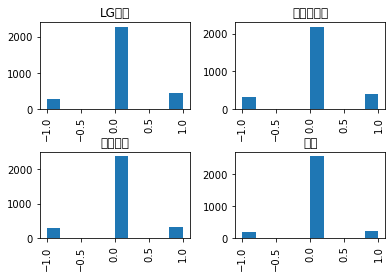

In [55]:
df[(df['기업'] == '삼성전자') | (df['기업'] == 'LG화학') | (df['기업'] == '흥국') | (df['기업'] == '더존비즈온')]\
.hist(column='senti_state', by='기업')

In [98]:
df_se[df_se['기업'] == '동화약품']

,기업,날짜,code,senti_score
880755,동화약품,2017-01-03,20,0
880756,동화약품,2017-01-04,20,0
880757,동화약품,2017-01-04,20,0
880758,동화약품,2017-01-09,20,0
880759,동화약품,2017-01-10,20,0
...,...,...,...,...
883750,동화약품,2021-12-29,20,0
883751,동화약품,2021-12-29,20,0
883752,동화약품,2021-12-31,20,0
883753,동화약품,2021-12-31,20,0


In [48]:
sd = pd.DataFrame(df.groupby('기업')['senti_state'].value_counts())
sd

senti_state
기업     senti_state             
AJ네트웍스  0                  1516
       -1                   260
        1                   233
AK 홀딩스  0                  1900
       -1                   334
...                         ...
희림      1                   304
       -1                   204
힘스      0                  1447
        1                   217
       -1                   213

[4877 rows x 1 columns]

In [49]:
sd = sd.sort_index()
sd

senti_state
기업     senti_state             
AJ네트웍스 -1                   260
        0                  1516
        1                   233
AK 홀딩스 -1                   334
        0                  1900
...                         ...
희림      0                  1968
        1                   304
힘스     -1                   213
        0                  1447
        1                   217

[4877 rows x 1 columns]

In [50]:
pos_name = []

for i in range(2,4877,3):
    if int(sd.iloc[i].values) > int(sd.iloc[i-2].values):
        pos_name.append(sd.index[i][0])

In [52]:
len(pos_name)

938

In [56]:
pos_name

['BGF',
 'BNK 금융그룹',
 'BYC',
 'BYC Co',
 'CBI',
 'CJ CGV',
 'CJ Corp',
 'CJ ENM',
 'CJ 그룹',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ제일제당',
 'CJ프레시웨이',
 'CNH',
 'CSA 코스믹',
 'DB',
 'E M',
 'EveryBot',
 'F&F홀딩스',
 'FSN',
 'HDC현대EP',
 'HLB',
 'HMM',
 'Human N',
 'IHQ',
 'ISC',
 'JTC',
 'JW중외제약',
 'JYP Ent.',
 'KB금융',
 'KCC',
 'KCC건설',
 'KCI',
 'KG ETS',
 'KG이니시스',
 'KMH',
 'KSS해운',
 'KT',
 'KT&G',
 'KTcs',
 'LF',
 'LG',
 'LG 화학',
 'LG디스플레이',
 'LG생활건강',
 'LG유플러스',
 'LG이노텍',
 'LG전자',
 'LG헬로비전',
 'LG화학',
 'LIG넥스원',
 'LS',
 'LS Electric',
 'LS전선아시아',
 'LX세미콘',
 'LX인터내셔널',
 'LX하우시스',
 'MH에탄올',
 'Npd',
 'OCI',
 'PHA',
 'PN풍년',
 'S D',
 'SM C&C',
 'SNK',
 'SNT모티브',
 'SNT에너지',
 'SNT중공업',
 'SNT홀딩스',
 'SPC삼립',
 'STX',
 'STX엔진',
 'STX중공업',
 'SUN&L',
 'TJ미디어',
 'WeMade Play',
 'YG PLUS',
 'YTN',
 'YW',
 'iMBC',
 '가비아',
 '가온미디어',
 '가온전선',
 '감성코퍼레이션',
 '강남제비스코',
 '강원랜드',
 '갤럭시아SM',
 '갤럭시아머니트리',
 '경남스틸',
 '경동가스',
 '경동나비엔',
 '경동제약',
 '경방',
 '경보제약',
 '경인양행',
 '경인전자',
 '경창산업',
 '계룡건설',
 '계양전기',
 '고려신용정보',
 '고려아연',
 '고려제강'

### Quant

In [79]:
df_financial = pd.read_csv('최종재무제표.csv')
df_financial = df_financial.drop('Unnamed: 0', axis = 1)
df_financial

,PCR,수정주가,CPS,code,year,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),name
0,26.47,52900.0,1999.0,108320,2017,6928.0,455.0,455.0,484.0,471.0,...,4948.85,2894.0,18.28,25345.0,2.09,700.0,1.32,24.19,16264300.0,LX세미콘
1,19.96,33600.0,1683.0,108320,2018,7918.0,558.0,558.0,592.0,490.0,...,5397.94,3010.0,11.16,27460.0,1.22,830.0,2.47,27.57,16264300.0,LX세미콘
2,31.28,39800.0,1272.0,108320,2019,8671.0,473.0,473.0,469.0,385.0,...,5711.99,2370.0,16.80,29033.0,1.37,830.0,2.09,35.03,16264300.0,LX세미콘
3,11.41,58200.0,5100.0,108320,2020,11619.0,942.0,942.0,909.0,725.0,...,6451.03,4459.0,13.05,32727.0,1.78,1350.0,2.32,30.27,16264300.0,LX세미콘
4,6.46,167300.0,25916.0,108320,2021,18988.0,3696.0,3696.0,3807.0,2964.0,...,9741.40,18225.0,9.18,49208.0,3.40,5400.0,3.23,29.63,16264300.0,LX세미콘
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,-37.20,27300.0,-734.0,050540,2017,1285.0,-31.0,-31.0,7.0,3.0,...,174.32,162.0,168.16,13851.0,1.97,0.0,0.00,0.00,2811871.0,Hankook
8651,-23.77,30500.0,-1283.0,050540,2018,1284.0,-93.0,-93.0,-187.0,-193.0,...,150.05,-6646.0,NaN,11018.0,2.77,0.0,0.00,0.00,3878559.0,Hankook
8652,-5.78,20350.0,-3522.0,050540,2019,1211.0,-123.0,-123.0,-420.0,-370.0,...,-30.31,-9069.0,NaN,2978.0,6.83,0.0,0.00,0.00,3878559.0,Hankook
8653,2.21,2820.0,1276.0,050540,2020,1107.0,-7.0,-7.0,-52.0,-45.0,...,-38.53,-907.0,NaN,1954.0,1.44,0.0,0.00,0.00,5078559.0,Hankook


In [80]:
pos_list = []

for i in pos_name:
    pos_list.append(df_financial[df_financial['name'] == i])

In [81]:
df_pos_name = pd.concat(pos_list)
df_pos_name

,PCR,수정주가,CPS,code,year,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),name
1915,1.85,15250.0,8232.0,027410,2017,1243.0,110.0,110.0,-43.0,34979.0,...,13439.63,74962.0,0.20,21957.0,0.69,200.0,1.31,0.18,32263719.0,BGF
1916,-23.20,8070.0,-348.0,027410,2018,2206.0,295.0,295.0,523.0,472.0,...,1476.53,575.0,14.04,15547.0,0.52,35.0,0.43,6.91,95369179.0,BGF
1917,38.68,5600.0,145.0,027410,2019,1334.0,264.0,264.0,246.0,175.0,...,1495.87,281.0,19.91,15700.0,0.36,110.0,1.96,39.18,95716791.0,BGF
1918,21.95,4895.0,223.0,027410,2020,1544.0,146.0,146.0,161.0,179.0,...,1512.94,285.0,17.20,15782.0,0.31,110.0,2.25,38.65,95716791.0,BGF
1919,332.10,5290.0,16.0,027410,2021,2068.0,115.0,115.0,165.0,360.0,...,1571.03,685.0,7.73,16393.0,0.32,110.0,2.08,16.06,95716791.0,BGF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,7.27,18750.0,2579.0,064350,2017,27257.0,454.0,454.0,-479.0,-463.0,...,216.78,-557.0,NaN,15811.0,1.19,0.0,0.00,0.00,85000000.0,현대로템
791,-166.79,27850.0,-167.0,064350,2018,24119.0,-1962.0,-1962.0,-3241.0,-3080.0,...,146.59,-3539.0,NaN,12282.0,2.27,0.0,0.00,0.00,85000000.0,현대로템
792,-6.60,15600.0,-2364.0,064350,2019,24593.0,-2799.0,-2799.0,-3494.0,-3557.0,...,59.32,-4168.0,NaN,9695.0,1.61,0.0,0.00,0.00,85000000.0,현대로템
793,29.06,17200.0,592.0,064350,2020,27853.0,821.0,821.0,150.0,224.0,...,73.28,325.0,52.85,12493.0,1.38,NaN,NaN,0.00,109142293.0,현대로템


In [82]:
# 연간 수익률

yearly_price_df = df_pos_name.pivot_table(index='year', columns = 'name', values='수정주가')
yearly_price_df

name,BGF,BNK 금융그룹,BYC,BYC Co,CBI,CJ CGV,CJ Corp,CJ ENM,CJ 그룹,CJ대한통운,...,유비케어,유안타증권,이상네트웍스,중앙백신,지노믹트리,지어소프트,칩스앤미디어,태경비케이,티앤알바이오팹,현대로템
year,,,,,,,,,,,,,,,,,,,,,
2017,15250.0,9420.0,306000.0,306000.0,532.0,67305.0,171148.0,231000.0,171148.0,140000.0,...,3650.0,3860.0,7864.0,13890.0,7000.0,2300.0,6310.0,2770.0,NaN,18750.0
2018,8070.0,7330.0,246000.0,246000.0,459.0,37190.0,121500.0,201900.0,121500.0,167000.0,...,4400.0,3140.0,6719.0,16600.0,27550.0,3225.0,4918.0,2600.0,4460.0,27850.0
2019,5600.0,7660.0,236500.0,236500.0,478.0,31340.0,96600.0,159600.0,96600.0,155000.0,...,5740.0,2865.0,6421.0,18000.0,23450.0,4200.0,7326.0,4345.0,5005.0,15600.0
2020,4895.0,5680.0,286500.0,286500.0,1750.0,25200.0,92100.0,139500.0,92100.0,165500.0,...,9600.0,3055.0,6358.0,17200.0,14650.0,14100.0,12200.0,4040.0,8434.0,17200.0
2021,5290.0,8400.0,450500.0,450500.0,3305.0,25050.0,83400.0,138800.0,83400.0,126000.0,...,7550.0,4020.0,6295.0,15000.0,13300.0,19000.0,23700.0,5080.0,25126.0,20800.0


In [83]:
yearly_rtn_df = yearly_price_df.pct_change().shift(-1)
yearly_rtn_df

name,BGF,BNK 금융그룹,BYC,BYC Co,CBI,CJ CGV,CJ Corp,CJ ENM,CJ 그룹,CJ대한통운,...,유비케어,유안타증권,이상네트웍스,중앙백신,지노믹트리,지어소프트,칩스앤미디어,태경비케이,티앤알바이오팹,현대로템
year,,,,,,,,,,,,,,,,,,,,,
2017,-0.470820,-0.221868,-0.196078,-0.196078,-0.137218,-0.447441,-0.290088,-0.125974,-0.290088,0.192857,...,0.205479,-0.186528,-0.145600,0.195104,2.935714,0.402174,-0.220602,-0.061372,NaN,0.485333
2018,-0.306072,0.045020,-0.038618,-0.038618,0.041394,-0.157300,-0.204938,-0.209510,-0.204938,-0.071856,...,0.304545,-0.087580,-0.044352,0.084337,-0.148820,0.302326,0.489630,0.671154,0.122197,-0.439856
2019,-0.125893,-0.258486,0.211416,0.211416,2.661088,-0.195916,-0.046584,-0.125940,-0.046584,0.067742,...,0.672474,0.066318,-0.009812,-0.044444,-0.375267,2.357143,0.665302,-0.070196,0.685115,0.102564
2020,0.080695,0.478873,0.572426,0.572426,0.888571,-0.005952,-0.094463,-0.005018,-0.094463,-0.238671,...,-0.213542,0.315876,-0.009909,-0.127907,-0.092150,0.347518,0.942623,0.257426,1.979132,0.209302
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# PER : 0 ~ 10

df_pos_name = df_pos_name[(df_pos_name['PER(배)'] > 0) & (df_pos_name['PER(배)'] < 10)]

In [85]:
# PBR : 0 ~ 1

df_pos_name = df_pos_name[(df_pos_name['PBR(배)'] > 0) & (df_pos_name['PBR(배)'] < 1)]

In [86]:
# PCR : 0 ~ 5

df_pos_name = df_pos_name[(df_pos_name['PCR'] > 0) & (df_pos_name['PCR'] < 5)]

In [87]:
# ROE : 10% 이상

df_pos_name = df_pos_name[df_pos_name['ROE(%)'] >= 0.1]

In [88]:
selected_df = df_pos_name.pivot(index='year', columns='name', values='PBR(배)')
selected_df

name,BGF,BNK 금융그룹,F&F홀딩스,KB금융,KCC,KCC건설,KMH,KSS해운,KT,KTcs,...,우리금융지주,우리손에프앤지,우리조명,웅진씽크빅,원림,원익홀딩스,윙입푸드,유니드,유비벨록스,유안타증권
year,,,,,,,,,,,,,,,,,,,,,
2017,0.69,0.44,NaN,NaN,NaN,0.51,0.93,0.91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,NaN,NaN,...,NaN,0.61,NaN,0.38,NaN,0.36,0.67,NaN,NaN,NaN
2019,NaN,NaN,NaN,0.48,NaN,0.37,0.56,0.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,0.47
2020,NaN,NaN,NaN,NaN,0.31,0.44,NaN,NaN,0.41,0.55,...,0.3,0.67,0.61,NaN,0.38,0.57,0.56,0.54,0.78,NaN
2021,NaN,NaN,0.67,NaN,NaN,NaN,NaN,0.78,0.48,NaN,...,NaN,0.63,0.65,0.99,NaN,0.39,0.34,NaN,NaN,NaN


In [89]:
asset_on_df = selected_df.notna().astype(int).replace(0, np.nan)
asset_on_df

name,BGF,BNK 금융그룹,F&F홀딩스,KB금융,KCC,KCC건설,KMH,KSS해운,KT,KTcs,...,우리금융지주,우리손에프앤지,우리조명,웅진씽크빅,원림,원익홀딩스,윙입푸드,유니드,유비벨록스,유안타증권
year,,,,,,,,,,,,,,,,,,,,,
2017,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2019,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2020,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN
2021,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN


In [90]:
# 연도별 투자 수익률

rtn_series = (yearly_rtn_df * asset_on_df).mean(axis=1)
rtn_series

year
2017   -0.075989
2018    0.135737
2019    0.267149
2020    0.376931
2021         NaN
dtype: float64

<AxesSubplot:xlabel='year'>

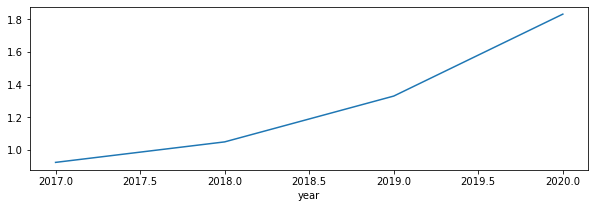

In [91]:
cum_rtn_str_df.plot(figsize=(10,3))

In [92]:
# 연도별 누적 수익률

cum_rtn_str_df = (rtn_series + 1).cumprod()
cum_rtn_str_df

year
2017    0.924011
2018    1.049434
2019    1.329789
2020    1.831028
2021         NaN
dtype: float64

<AxesSubplot:xlabel='year'>

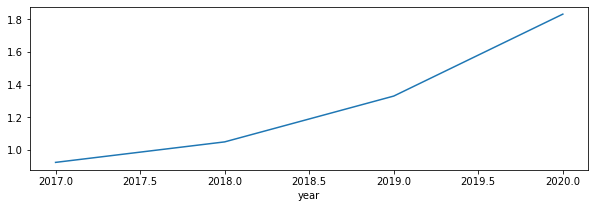

In [93]:
cum_rtn_str_df.plot(figsize=(10,3))

In [100]:
pos_name

['BGF',
 'BNK 금융그룹',
 'BYC',
 'BYC Co',
 'CBI',
 'CJ CGV',
 'CJ Corp',
 'CJ ENM',
 'CJ 그룹',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ제일제당',
 'CJ프레시웨이',
 'CNH',
 'CSA 코스믹',
 'DB',
 'E M',
 'EveryBot',
 'F&F홀딩스',
 'FSN',
 'HDC현대EP',
 'HLB',
 'HMM',
 'Human N',
 'IHQ',
 'ISC',
 'JTC',
 'JW중외제약',
 'JYP Ent.',
 'KB금융',
 'KCC',
 'KCC건설',
 'KCI',
 'KG ETS',
 'KG이니시스',
 'KMH',
 'KSS해운',
 'KT',
 'KT&G',
 'KTcs',
 'LF',
 'LG',
 'LG 화학',
 'LG디스플레이',
 'LG생활건강',
 'LG유플러스',
 'LG이노텍',
 'LG전자',
 'LG헬로비전',
 'LG화학',
 'LIG넥스원',
 'LS',
 'LS Electric',
 'LS전선아시아',
 'LX세미콘',
 'LX인터내셔널',
 'LX하우시스',
 'MH에탄올',
 'Npd',
 'OCI',
 'PHA',
 'PN풍년',
 'S D',
 'SM C&C',
 'SNK',
 'SNT모티브',
 'SNT에너지',
 'SNT중공업',
 'SNT홀딩스',
 'SPC삼립',
 'STX',
 'STX엔진',
 'STX중공업',
 'SUN&L',
 'TJ미디어',
 'WeMade Play',
 'YG PLUS',
 'YTN',
 'YW',
 'iMBC',
 '가비아',
 '가온미디어',
 '가온전선',
 '감성코퍼레이션',
 '강남제비스코',
 '강원랜드',
 '갤럭시아SM',
 '갤럭시아머니트리',
 '경남스틸',
 '경동가스',
 '경동나비엔',
 '경동제약',
 '경방',
 '경보제약',
 '경인양행',
 '경인전자',
 '경창산업',
 '계룡건설',
 '계양전기',
 '고려신용정보',
 '고려아연',
 '고려제강'

In [219]:
test_df = df[df['기업'] == '로스웰']
test_df

,기업,날짜,제목,내용,code,제목_내용,token,senti_score,senti_state
964404,로스웰,2017-01-01,[머니+]코스닥 '1월 효과' 기대주는,"최종경 연구원은 해당 종목으로 로스웰, 인텔리안테크를 김병연 연구원은 인크로스,...",900260,"[머니+]코스닥 '1월 효과' 기대주는 최종경 연구원은 해당 종목으로 로스웰, 인...",머니 코스닥 월 효과 기 대주 는 최종 경 연구원 은 해당 종목 으로 로스웰...,1,1
964405,로스웰,2017-01-02,"[더벨]삼성, 3연타석 홈런…에퀴티마켓 살렸다","로스웰인터내셔널과 용평리조트, 해태제과가 주목을 받긴 했지만 모두 공모 규모가 ...",900260,"[더벨]삼성, 3연타석 홈런…에퀴티마켓 살렸다 로스웰인터내셔널과 용평리조트, 해태...",더벨 삼성 연 타석 홈런 에퀴 티 마켓 살렸다 로스웰 인터내셔널 과 용평리...,0,0
964406,로스웰,2017-01-02,"[더벨]2000억 시장 형성, 한국·NH증권 수수료 300억 돌파",중국기업인 로스웰인터내셔널(51억 원)과 헝셩그룹(42억 원) 단 두건의 IPO...,900260,"[더벨]2000억 시장 형성, 한국·NH증권 수수료 300억 돌파 중국기업인 로스...",더벨 억 시장 형성 한국 증권 수수료 억 돌파 중국 기업인 로스웰 인터내셔...,0,0
964407,로스웰,2017-01-03,"오가닉티코스메틱, 중국 산아제한정책 완화 수혜주","▷ 관련 섹터 (국내 상장 중국기업) 골든센츄리, 로스웰, 에스앤씨엔진그룹, G...",900260,"오가닉티코스메틱, 중국 산아제한정책 완화 수혜주 ▷ 관련 섹터 (국내 상장 중국기...",오가 닉티 코스 메 틱 중국 산아제한 정책 완화 수 혜주 관련 섹터 국내 상장...,0,0
964408,로스웰,2017-01-03,[서울경제TV] '코스닥의 계절' 눈 여겨볼 종목은,BNK투자증권은 불안한 시장 상황에 기인해 공모가 언저리에서 주가 반등 기회를 ...,900260,[서울경제TV] '코스닥의 계절' 눈 여겨볼 종목은 BNK투자증권은 불안한 시장 ...,서울 경제 코스닥 의 계절 눈 여겨 볼 종목 은 투자 증권 은 불안한 시...,1,1
...,...,...,...,...,...,...,...,...,...
966281,로스웰,2021-12-30,"[오늘의 급등주] 로스웰·한국정보공학·티피씨글로벌·안랩·네오위즈, 급등...",오늘(30일) 로스웰은 코스닥시장에서 전 거래일 대비 80원(29.96%) 급등...,900260,"[오늘의 급등주] 로스웰·한국정보공학·티피씨글로벌·안랩·네오위즈, 급등... 오늘...",오늘 의 급등 주 로스웰 한국 정보공학 티피 씨 글로벌 안랩 네오위즈 ...,0,0
966282,로스웰,2021-12-30,[코스닥] 일중 변동성 상위 종목은?...지나인제약·로스웰·티피씨글로벌 순,변동률이 두번째로 높은 종목은 로스웰 종목으로 27.54%를 기록했다. 이날 최...,900260,[코스닥] 일중 변동성 상위 종목은?...지나인제약·로스웰·티피씨글로벌 순 변동률...,코스닥 일 중 변동성 상위 종목 은 지 나인 제약 로스웰 티피 씨 글로벌 ...,0,0
966283,로스웰,2021-12-30,게임소프트웨어 등 오늘의 강세 업종 - 30일,"그 외 마이크로컨텍솔, 샘씨엔에스, 티엘비등 주가도 상승했다. 금일 상한가를 기...",900260,"게임소프트웨어 등 오늘의 강세 업종 - 30일 그 외 마이크로컨텍솔, 샘씨엔에스,...",게임 소프트웨어 등 오늘 의 강세 업종 일 그 외 마이크로 컨텍 솔 샘 씨 엔 ...,1,1
966284,로스웰,2021-12-30,[오늘 주가마감 / 코스닥] 거래상위 Top5- WI·경남스틸·로스웰·티비씨·바...,"▲ WI, 전 거래일 대비 165원(14.54%)↑ 1천300원 상승 마감 ▲ ...",900260,[오늘 주가마감 / 코스닥] 거래상위 Top5- WI·경남스틸·로스웰·티비씨·바.....,오늘 주가 마감 코스닥 거래 상위 경남 스틸 로스웰 티비 씨 바...,0,0


In [118]:
px.line(test_df, x='날짜', y='senti_state')

In [119]:
fig = px.line(test_df, x='날짜', y='senti_state')
fig.update_xaxes(rangeslider_visible=True)

In [220]:
fig2 = px.line(test_df, x='날짜', y='senti_score')
fig2.update_xaxes(rangeslider_visible=True)

In [221]:
test_fdr = fdr.DataReader('900260', '2020.01', '2020.12.31')

In [222]:
# test_fdrs = pd.concat(test_fdr)
# test_fdrs

In [223]:
fig_test = px.line(test_fdr, x=test_fdr.index, y='Change')
fig_test.update_xaxes(rangeslider_visible=True)